# Atmosphere Numerical and Data Analysis Answers

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from SciServer import CasJobs
from SciServer import Authentication
from io import StringIO
from astropy.table import Table
import requests

## 1. Plot sky brightness vs airmass for SDSS imaging observations

*Based on answer by David Mykytyn*

We first define a function to retrieve the data we are interested in for a given run.

In [5]:
def retrieve_camcol(run=756, camcol=3):
    # We define the columns we want and their 
    columns = ('ra', 'dec', 'airmass_g', 'airmass_i', 'sky_g', 'sky_i', 'field')
    dtypes= ('f8', 'f8', 'f4', 'f4', 'f4', 'f4', 'i4')

    # Now define the query
    query = """
SELECT {columns}
FROM Field 
WHERE run = {run} and camcol = {camcol}
"""
    query = query.format(columns=', '.join(list(columns)),
                         run=run, camcol=camcol)

    # Execute the query (requires internet access)
    responseStream = CasJobs.executeQuery(query, "DR12", format="dict")

    # convert result into astropy table
    result = responseStream['Result'][0]
    data = list(map(list, zip(*result['Data'])))
    fields = Table(data, names=columns, dtype=dtypes)
    isort = np.argsort(fields['field'])
    fields = fields[isort]
    return(fields)

Now we define a function to plot the asked-for results.

In [43]:
def plot_sky(fields=None):
    field = fields['field']
    sky_g = 22.5 - 2.5 * np.log10(fields['sky_g'])
    sky_i = 22.5 - 2.5 * np.log10(fields['sky_i'])
    airmass_g = fields['airmass_g']
    airmass_i = fields['airmass_i']
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes[0, 0].plot(field, sky_g)
    axes[0, 0].set_xlabel('Field Number')
    axes[0, 0].set_ylabel('g_band sky (mag/arcsec$^2$)')
    axes[0, 1].plot(airmass_g, sky_g, '.')
    axes[0, 1].set_xlabel('airmass g')
    axes[0, 1].set_ylabel('g_band sky (mag/arcsec$^2$)')
    axes[1, 0].plot(field, sky_i)
    axes[1, 0].set_xlabel('Field Number')
    axes[1, 0].set_ylabel('i_band sky (mag/arcsec$^2$)')
    axes[1, 1].plot(airmass_i, sky_i, '.')
    axes[1, 1].set_xlabel('airmass i')
    axes[1, 1].set_ylabel('i_band sky (mag/arcsec$^2$)')

First, let us consider a run that turns out to be taken at almost fixed airmass the entier time. We see substantial variation in sky brightness in both bands that correlates with field (time) in the same manner for both. This indicates sky that is coming from scattered light that is varying with time.

/Users/blanton/anaconda3/lib/python3.6/site-packages/SciServer-1.10.2-py3.6.egg/SciServer/CasJobs.py:116: Warning: In Authentication.getToken: Authentication token is not defined: the user did not log in with the Authentication.login function, or the token has not been stored in the command line argument --ident.


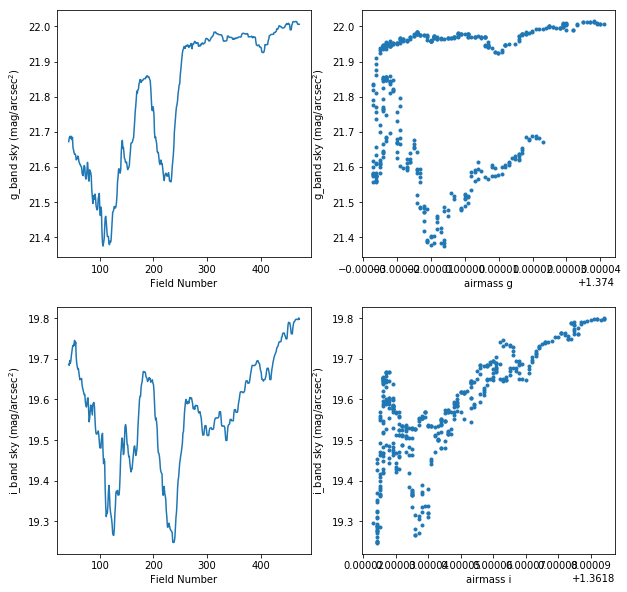

In [44]:
fields = retrieve_camcol(run=4905)
plot_sky(fields)

But we can also consider a run where there is substantial variation of airmass. There is often a clear correlation of brightness with airmass. As you get further from zenith, you expect the brightness to increase. Note that this does not happen with the exact factor you expect (linear with airmass), because the sky is not uniform and it also varies, even for the $g$ band. For the $i$ band, the OH emission is even more variable in space and time, and so you see extra variation there.

/Users/blanton/anaconda3/lib/python3.6/site-packages/SciServer-1.10.2-py3.6.egg/SciServer/CasJobs.py:116: Warning: In Authentication.getToken: Authentication token is not defined: the user did not log in with the Authentication.login function, or the token has not been stored in the command line argument --ident.


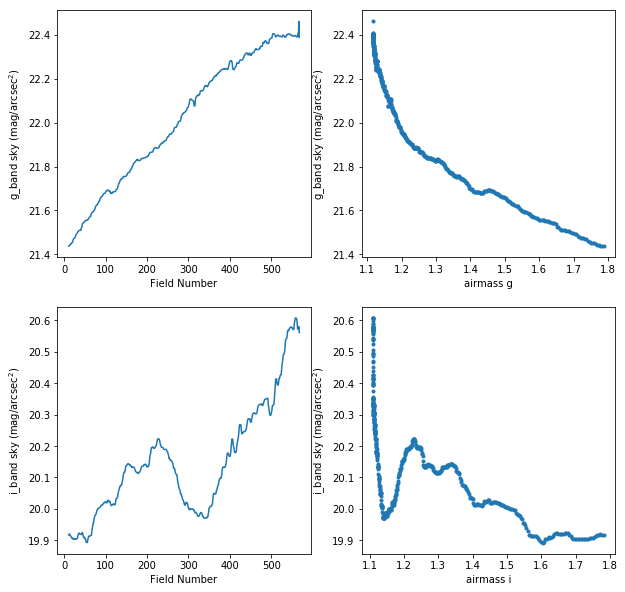

In [46]:
fields = retrieve_camcol(run=4822)
plot_sky(fields)